In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load dataset
df = pd.read_csv("processed_used_cars.csv")
df.head()

,brand,model,model_year,fuel_type,price_numeric $,milage_numeric,engine_hp HP,power_to_price,vehicle_age,age_group
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,10300.0,51000.0,300.0,29.13,12,11-15 years
1,INFINITI,Q50 Hybrid Sport,2015,Hybrid,15500.0,88900.0,354.0,22.84,10,6-10 years
2,Audi,S3 2.0T Premium Plus,2017,Gasoline,31000.0,84000.0,292.0,9.42,8,6-10 years
3,BMW,740 iL,2001,Gasoline,7300.0,242000.0,282.0,38.63,24,21-25 years
4,Lexus,RC 350 F Sport,2021,Gasoline,41927.0,23436.0,311.0,7.42,4,0-5 years


In [3]:
# Define features and target
features = ['price_numeric $', 'vehicle_age', 'milage_numeric', 'engine_hp HP', 'brand']
target = 'power_to_price'

# Drop missing values
df.dropna(subset=features + [target], inplace=True)

X = df[features]
y = df[target]

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Preprocessing and pipeline
numeric_features = ['price_numeric $', 'vehicle_age', 'milage_numeric', 'engine_hp HP']
categorical_features = ['brand']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [6]:
# RandomizedSearchCV parameters
param_grid = {
    'regressor__n_estimators': [100],
    'regressor__max_depth': [10, None]
}

search = RandomizedSearchCV(pipeline, param_grid, cv=3, n_iter=2, scoring='r2', n_jobs=-1)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['price_numeric '
                                                                                '$',
                                                                                'vehicle_age',
                                                                                'milage_numeric',
                                                                                'engine_hp '
                                                                                'HP']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['brand'])])),
                                             ('regressor',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'regressor__max_depth': [10, None],
                                        'regressor__n_estimators': [100]},
                   scoring='r2')

In [7]:
# Evaluate model
y_pred = search.best_estimator_.predict(X_test)

print("Best Params:", search.best_params_)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

Best Params: {'regressor__n_estimators': 100, 'regressor__max_depth': None}
R²: 0.9576818700112127
RMSE: 2.4832607609072115
MAE: 0.5076585023400936


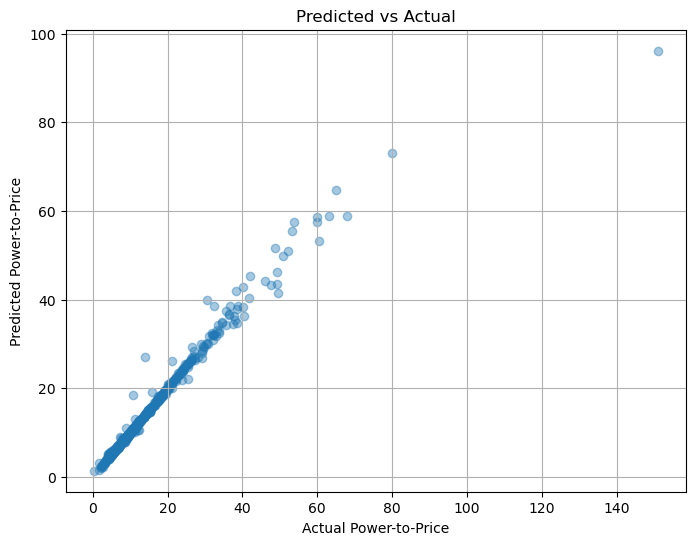

In [8]:
# Plot predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Power-to-Price")
plt.ylabel("Predicted Power-to-Price")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

In [9]:
# Save model
joblib.dump(search.best_estimator_, "power_to_price_model.joblib")
print("Model saved as 'power_to_price_model.joblib'")

Model saved as 'power_to_price_model.joblib'
